In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-implicit-ab4)

We study the convergence of AB4 using the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. As usual, `solve` is called to give an accurate reference solution.

In [2]:
using OrdinaryDiffEq
ivp = ODEProblem((u, p, t) -> sin((t + u)^2), -1.0, (0.0, 4.0))
u_ref = solve(ivp, Tsit5(), reltol=1e-14, abstol=1e-14);

Now we perform a convergence study of the AB4 code.

In [3]:
n = @. [round(Int, 4 * 10^k) for k in 0:0.5:3]
err = []
for n in n
    t, u = FNC.ab4(ivp, n)
    push!(err, norm(u_ref.(t) - u, Inf))
end
@pt :header=["n", "inf-norm error"] [n err]

n,inf-norm error
4,0.50044
13,1.39129
40,0.00627809
126,9.94942e-5
400,1.09598e-6
1265,1.12766e-8
4000,1.13736e-10


The method should converge as $O(h^4)$, so a log-log scale is appropriate for the errors.

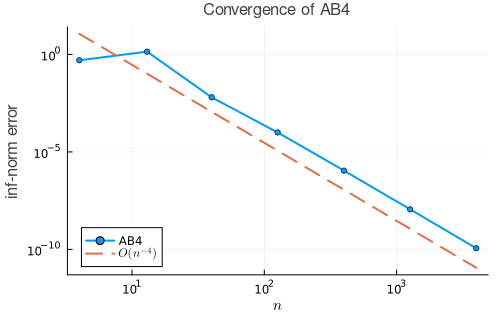

In [4]:
using Plots
plot(n, err, m=3, 
    label="AB4",  legend=:bottomleft,
    xaxis=(:log10, L"n"),  yaxis=(:log10, "inf-norm error"),
    title="Convergence of AB4")

plot!(n, 0.1 * err[end] * (n / n[end]) .^ (-4), l=:dash, label=L"O(n^{-4})")